In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip install pyarrow

In [3]:
all_data = pd.read_feather(r"C:\Users\saadais\OneDrive - Hewlett Packard Enterprise\Desktop\Auto_f\Python\UDEMY\4..+Sales+Analysis/Sales_data.ftr")

In [4]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# transform data into acceptable format

In [5]:
all_data.shape

(186850, 6)

### null data 

In [6]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
all_data= all_data.dropna()

### dupplicated data 

In [8]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [9]:
all_data=all_data.drop_duplicates()

## best month of sale

In [10]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [11]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185687,185687,185687,185687,185687,185687
unique,178438,20,10,24,142396,140788
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21859,168291,21859,8,9


In [37]:
all_data['Product'].value_counts()

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [12]:
all_data['Month']=all_data['Order Date'].apply (lambda x : x.split(' ')[0].split('/')[0])


In [13]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


In [14]:
all_data['Month'].unique()

array(['04', '05', 'Order', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [15]:
filter1 = all_data['Month']=="Order"

In [16]:
all_data.loc[519]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Month                          Order
Name: 519, dtype: object

In [17]:
all_data = all_data[~filter1]

In [18]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [19]:
all_data["Month"] = all_data["Month"].astype(int)

In [20]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [21]:
all_data['Quantity Ordered']= all_data['Quantity Ordered'].astype(int)
all_data['Price Each']= all_data['Price Each'].astype(float)

In [22]:
all_data["total"]=all_data["Quantity Ordered"]* all_data["Price Each"]

In [23]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


<Axes: xlabel='Month'>

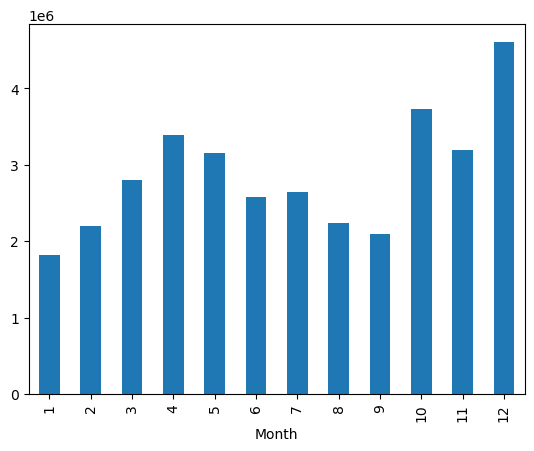

In [24]:
all_data.groupby(['Month'])['total'].sum().plot(kind='bar')

In [25]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x :x.split(',')[1])

<Axes: ylabel='Quantity Ordered'>

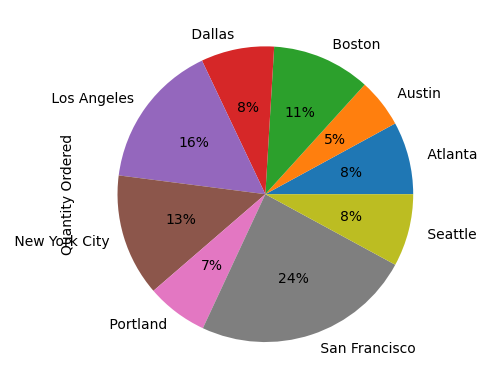

In [40]:
all_data.groupby(['city'])['Quantity Ordered'].sum().plot(kind='pie', autopct ='%1.0f%%')

## create bar, pie , trimap

<Axes: ylabel='count'>

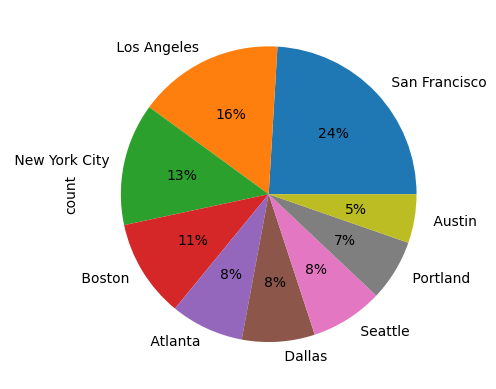

In [27]:
all_data['city'].value_counts().plot(kind='pie', autopct ='%1.0f%%')

## what product sold the most (in general user ratings / low price ) and why ?

In [28]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [29]:
df_order_price = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'})

In [44]:
df_order_price

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [30]:
df_order_price =df_order_price.reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '20in Monitor'),
  Text(1, 0, '27in 4K Gaming Monitor'),
  Text(2, 0, '27in FHD Monitor'),
  Text(3, 0, '34in Ultrawide Monitor'),
  Text(4, 0, 'AA Batteries (4-pack)'),
  Text(5, 0, 'AAA Batteries (4-pack)'),
  Text(6, 0, 'Apple Airpods Headphones'),
  Text(7, 0, 'Bose SoundSport Headphones'),
  Text(8, 0, 'Flatscreen TV'),
  Text(9, 0, 'Google Phone'),
  Text(10, 0, 'LG Dryer'),
  Text(11, 0, 'LG Washing Machine'),
  Text(12, 0, 'Lightning Charging Cable'),
  Text(13, 0, 'Macbook Pro Laptop'),
  Text(14, 0, 'ThinkPad Laptop'),
  Text(15, 0, 'USB-C Charging Cable'),
  Text(16, 0, 'Vareebadd Phone'),
  Text(17, 0, 'Wired Headphones'),
  Text(18, 0, 'iPhone')])

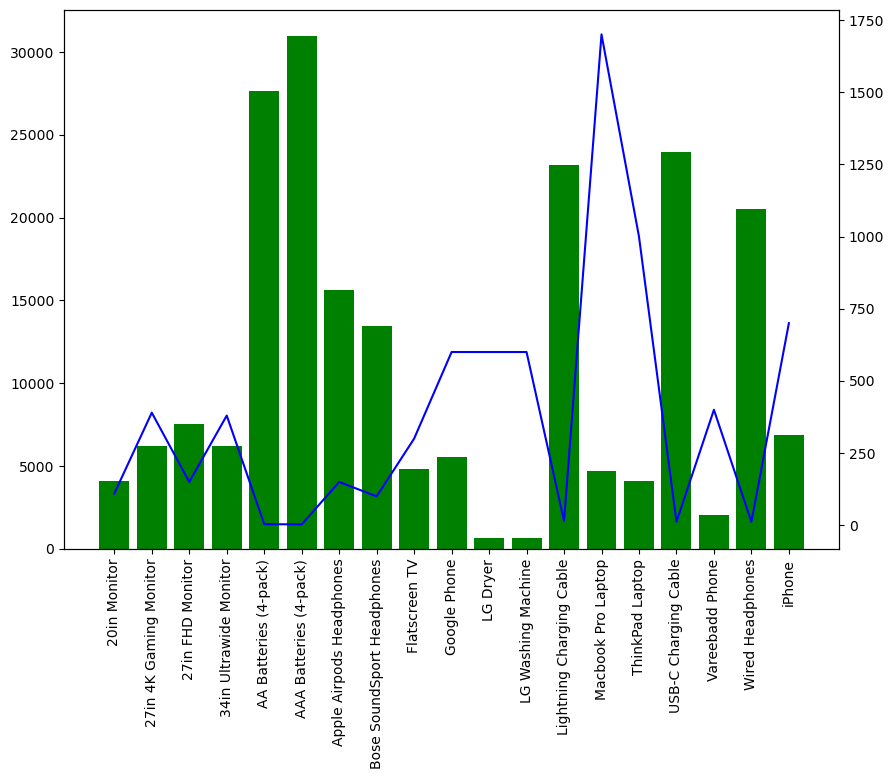

In [31]:
plt.figure(1, figsize=(10,7))


barchart = plt.bar(df_order_price["Product"], df_order_price["Quantity Ordered"], color ='green')
plt.xticks(rotation=90)
plt.twinx()
plotchart = plt.plot(df_order_price["Product"], df_order_price["Price Each"] , color='blue')
plt.xticks(rotation=45, ha='right')


In [32]:
df_order_price

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


## the most sold product 

In [69]:
most_sold_product = all_data['Product'].value_counts()[0:5].index

In [73]:
df_most_sold_product =all_data[all_data['Product'].isin(most_sold_product)]

In [81]:
pivot = df_most_sold_product.groupby(['Month', 'Product']).size().unstack()

<Axes: xlabel='Month'>

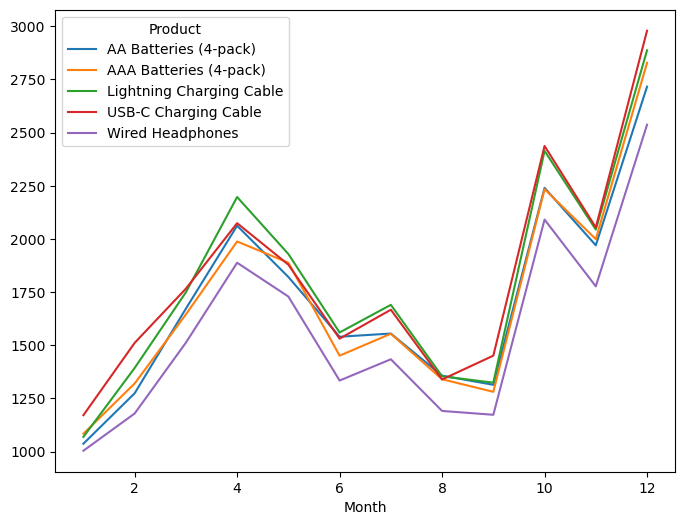

In [83]:
pivot.plot(figsize=(8,6))

## analysing what products are most ofen sold together

In [85]:
all_data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [96]:
all_data.shape

(185686, 9)

In [99]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]

In [100]:
df_dupplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [101]:
dup_df = df_dupplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_product'})

In [102]:
dup_df

,Order ID,grouped_product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [106]:
dup_products_df = df_duplicated.merge(dup_df, how ='left', on='Order ID')

In [115]:
dup_products_df['Order ID'].duplicated()

0        False
1         True
2        False
3         True
4        False
         ...  
14123     True
14124    False
14125     True
14126    False
14127     True
Name: Order ID, Length: 14128, dtype: bool

In [118]:
no_dup_df =dup_products_df.drop_duplicates(subset=['Order ID'])

In [119]:
no_dup_df.shape

(6879, 10)

<Axes: ylabel='count'>

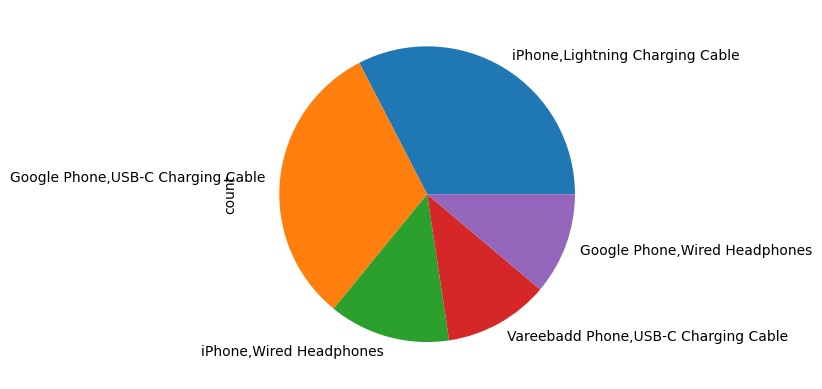

In [125]:
no_dup_df['grouped_product'].value_counts()[0:5].plot.pie()